In [189]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [190]:
def vol_surface(ticker):
    tk = yf.Ticker(ticker)
    exp_dates = tk.options
    try:
        currentPrice = tk.info['currentPrice']
    except KeyError:
        currentPrice = (tk.info['bid'] + tk.info['ask']) / 2
    currentDate = datetime.date.today()
    delta = datetime.timedelta(days = 3)
    delta_days = currentDate - delta
    
    chain = pd.DataFrame({'expiration': pd.Series(dtype='float64'),
                       'strike': pd.Series(dtype='float64'),
                       'impliedVolatility': pd.Series(dtype='float64')})
    
    for i in range(len(exp_dates)):
        temp_df = tk.option_chain(tk.options[i]).calls[['strike', 'impliedVolatility', 'lastTradeDate']]
        temp_df['lastTradeDate'] = pd.to_datetime(temp_df['lastTradeDate']).dt.date
        temp_df = temp_df.query('lastTradeDate >= @delta_days')
        temp_df = temp_df.drop(columns=['lastTradeDate'])
        temp_df['expiration'] = (datetime.datetime.strptime(exp_dates[i], '%Y-%m-%d').date() - currentDate).days / 365
        temp_df['strike'] = temp_df['strike'] / currentPrice
        
        chain = pd.concat([chain, temp_df])
    
    x, y, z = chain.strike, chain.expiration, chain.impliedVolatility
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    
    surf = ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, cmap=plt.cm.Spectral)
    ax.title.set_text(f'{ticker} implied volatility surface')
    ax.set_ylabel('Time until Expiration (years)')
    ax.set_xlabel('Strike % of Spot')
    ax.set_zlabel('Volatility')
    ax.view_init(30, 75)
    fig.colorbar( surf, shrink=0.5, aspect=5)
    plt.show()

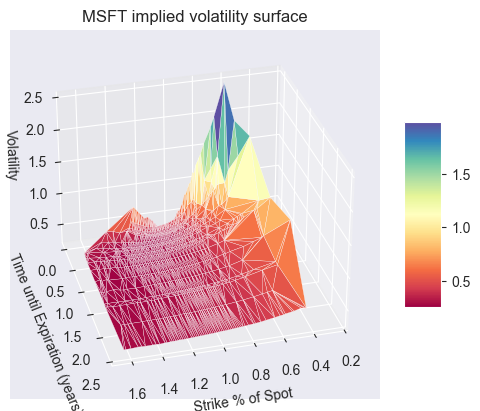

In [191]:
vol_surface('MSFT')

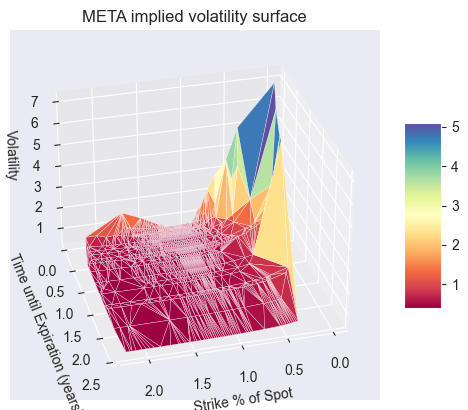

In [192]:
vol_surface('META')

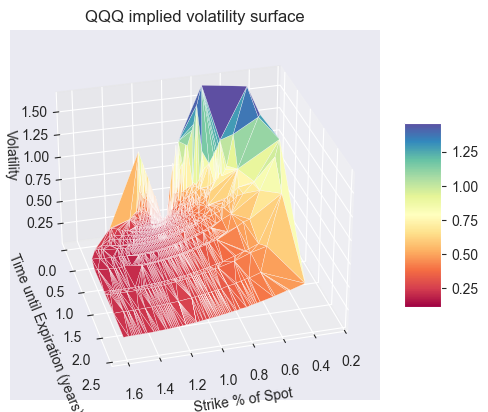

In [193]:
vol_surface('QQQ')

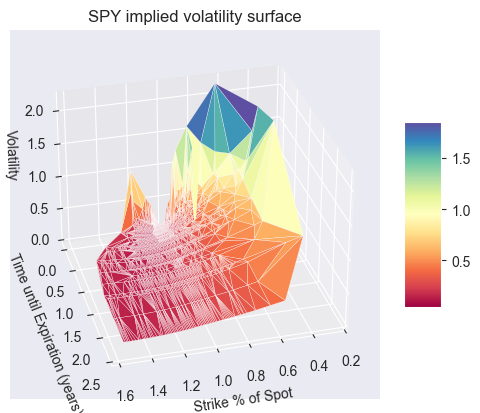

In [194]:
vol_surface('SPY')